In [3]:
# Cargar librerias preliminares
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
import pandas as pd

IMPORTAMOS DATOS

In [21]:
df = pd.read_excel('data motor.xlsx') 
df.head()
data = df.Ciclo.values
print(data)

[  1   2   3 ... 198 199 200]


Graficamos un histograma para visualizar el comportamiento de los datos

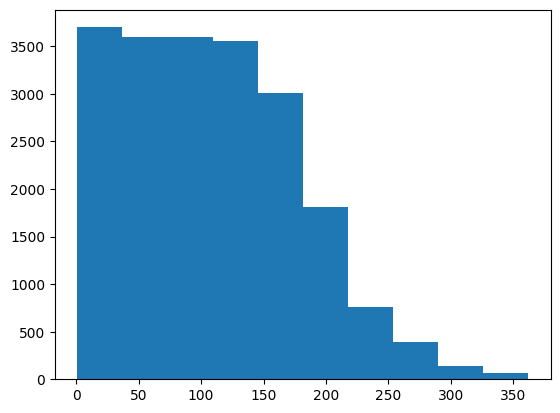

In [12]:
plt.hist(data)
plt.show()

Calculamos los valores del modelo weibull

In [13]:
# Estimamos los parámetros de la distribución Weibull
# shape : forma
# loc : localizacion
# scale : escala
shape_hat, loc_hat, scale_hat = weibull_min.fit(data)
shape_hat, loc_hat, scale_hat

(1.6365519173389522, -4.426292323470495, 126.12271900696715)

Graficamos que el modelo se acomoda perfectamente a los datos

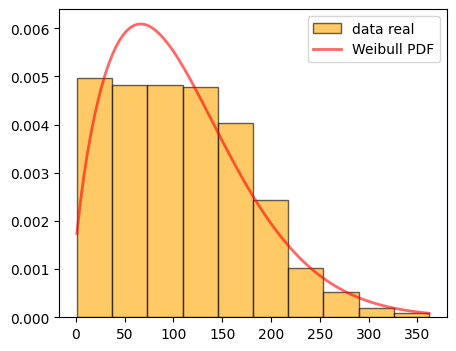

In [14]:
plt.figure(figsize=(5,4))

x = np.linspace(data.min(),
                data.max(), 100)
plt.hist(data, bins = 10, density = True, alpha = 0.6
         , color='orange', ec='black',label ='data real')
plt.plot(x, weibull_min.pdf(x, shape_hat, loc=loc_hat
                            , scale=scale_hat),
         'r-', lw=2, alpha=0.6, label='Weibull PDF')

plt.legend()
plt.show()

Calculo de probabilidad de faclla entre intervalos de tiempo

In [24]:
min = 0
max = 350

weibull_min.cdf(max, shape_hat, loc=loc_hat, scale=scale_hat) - weibull_min.cdf(min, shape_hat, loc=loc_hat, scale=scale_hat)

0.9914409532145397

Graficamos nuestro modelo de confiabilidad y de falla

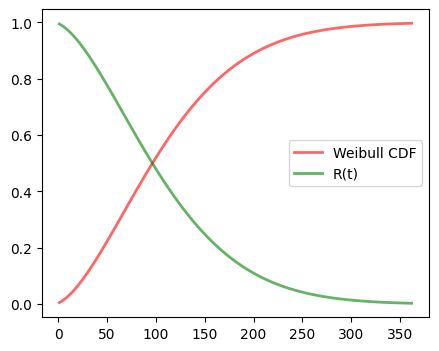

In [22]:
plt.figure(figsize=(5,4))
plt.plot(x, weibull_min.cdf(x, shape_hat, loc=loc_hat
                            , scale=scale_hat),
         'r-', lw=2, alpha = 0.6, label='Weibull CDF')
plt.plot(x, 1-weibull_min.cdf(x, shape_hat, loc=loc_hat
                              , scale=scale_hat),
         'g', lw=2, alpha=0.6, label='R(t)')
plt.legend()
plt.show()